# Real Estate Investment Analysis

What makes a zip code a hotspot for real estate investments? In the ever-evolving world of real estate, understanding market dynamics is essential for making informed investment decisions. This project explores the U.S. housing market through an extensive dataset, aiming to identify the key factors that influence rental investment potential. By analyzing metrics such as property prices, rental rates, population trends, and economic indicators, we seek to answer pressing questions:

- Where are the best opportunities for profitable rental investments?
- How do factors like income levels, educational attainment, and employment rates impact housing affordability?
- What market characteristics can help investors pinpoint areas with strong growth potential?

The dataset combines information from various sources, including Zillow property and rent prices, U.S. Census Bureau population data, and American Community Survey economic metrics. By integrating and analyzing this data, the project provides actionable insights to guide investment strategies in the real estate market.

Through this analysis, we aim to empower investors with a data-driven approach to navigating the complexities of real estate investment, helping them identify lucrative opportunities and avoid potential pitfalls.

## Data Cleaning and Preparation

### Loading Datasets
We begin by importing data from CSV files into pandas DataFrames for analysis. These files include data on property prices, rent prices, population, median age, homeownership rates, employment rates, educational attainment, and income. Cleaning and combining this data allows for meaningful analysis.

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

The property and rent datasets are loaded, and the column ```RegionName``` is renamed to ZipCode for consistency. This ensures that data from different datasets can be joined using ZipCode as a common key.

In [2]:
# Load data into pandas DataFrames
median_property_prices_by_zip_data = pd.read_csv("zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")

median_property_prices_by_zip_data.rename(columns={"RegionName": "ZipCode"}, inplace=True)
median_property_prices_by_zip_data["ZipCode"] = median_property_prices_by_zip_data["ZipCode"].astype(str)


median_property_prices_by_zip_data = median_property_prices_by_zip_data[
    median_property_prices_by_zip_data["ZipCode"].str.match(r"^\d{5}$")
]


# Example: Drop rows with excessive missing data
threshold = 0.3  # Allow rows with at most 30% missing values
median_property_prices_by_zip_data = median_property_prices_by_zip_data[
    median_property_prices_by_zip_data.isnull().mean(axis=1) < threshold
]


# Handle missing values by imputing or flagging
missing_data_property_summary = median_property_prices_by_zip_data.isnull().sum()
print("Missing Data Summary:\n", missing_data_property_summary)


# Display a quick overview of each dataset
print('Property Prices\n', median_property_prices_by_zip_data.head())

Missing Data Summary:
 RegionID      0
SizeRank      0
ZipCode       0
RegionType    0
StateName     0
             ..
2024-07-31    0
2024-08-31    1
2024-09-30    1
2024-10-31    1
2024-11-30    0
Length: 308, dtype: int64
Property Prices
    RegionID  SizeRank ZipCode RegionType StateName State      City  \
0     91982         1   77494        zip        TX    TX      Katy   
2     91940         3   77449        zip        TX    TX      Katy   
3     62080         4   11368        zip        NY    NY  New York   
4     91733         5   77084        zip        TX    TX   Houston   
5     93144         6   79936        zip        TX    TX   El Paso   

                                   Metro        CountyName     2000-01-31  \
0   Houston-The Woodlands-Sugar Land, TX  Fort Bend County  209435.722919   
2   Houston-The Woodlands-Sugar Land, TX     Harris County  103309.568185   
3  New York-Newark-Jersey City, NY-NJ-PA     Queens County  146620.762685   
4   Houston-The Woodlands-Sug

In [3]:
median_rent_prices_by_zip_file = "zip_zori_uc_sfrcondomfr_sm_sa_month.csv"
median_rent_prices_by_zip_data = pd.read_csv(median_rent_prices_by_zip_file)
median_rent_prices_by_zip_data.rename(columns={"RegionName": "ZipCode"}, inplace=True)
median_rent_prices_by_zip_data["ZipCode"] = median_rent_prices_by_zip_data["ZipCode"].astype(str)

median_rent_prices_by_zip_data = median_rent_prices_by_zip_data[
    median_rent_prices_by_zip_data["ZipCode"].str.match(r"^\d{5}$")
]

threshold = 0.3 
median_rent_prices_by_zip_data = median_rent_prices_by_zip_data[
    median_rent_prices_by_zip_data.isnull().mean(axis=1) < threshold
]

missing_data_rent_summary = median_rent_prices_by_zip_data.isnull().sum()
print("Missing Data Summary:\n", missing_data_rent_summary)

print('Rent Prices\n', median_rent_prices_by_zip_data.head())

Missing Data Summary:
 RegionID      0
SizeRank      0
ZipCode       0
RegionType    0
StateName     0
             ..
2024-07-31    0
2024-08-31    0
2024-09-30    0
2024-10-31    0
2024-11-30    0
Length: 128, dtype: int64
Rent Prices
    RegionID  SizeRank ZipCode RegionType StateName State          City  \
0     91982         1   77494        zip        TX    TX          Katy   
1     91940         3   77449        zip        TX    TX          Katy   
2     91733         5   77084        zip        TX    TX       Houston   
4     62093         7   11385        zip        NY    NY      New York   
5     92593         8   78660        zip        TX    TX  Pflugerville   

                                   Metro        CountyName   2015-01-31  ...  \
0   Houston-The Woodlands-Sugar Land, TX  Fort Bend County  1519.616063  ...   
1   Houston-The Woodlands-Sugar Land, TX     Harris County  1279.883137  ...   
2   Houston-The Woodlands-Sugar Land, TX     Harris County  1261.850008  ... 

Population data for 2010 and 2020 is processed to clean up column names and standardize ```ZipCode```. We calculate the population growth percentage to understand demographic trends, which can influence housing demand and affordability.

In [4]:
population_2010_by_zip_data = pd.read_csv("DECENNIALSF12010.P1-Data.csv", header=1)
population_2020_by_zip_data = pd.read_csv("DECENNIALDHC2020.P1-Data.csv", header=1)

rename_dict = {
    "Geographic Area Name": "ZipCode",
    "Total": "Total_Population",
    "!!Total": "Total_Population"
}

population_2010_by_zip_data.columns = population_2010_by_zip_data.columns.str.strip()
population_2020_by_zip_data.columns = population_2020_by_zip_data.columns.str.strip()


population_2010_by_zip_data.rename(columns=rename_dict, inplace=True)
population_2010_by_zip_data["ZipCode"] = population_2010_by_zip_data["ZipCode"].str[-5:] 
population_2010_by_zip_data["ZipCode"] = population_2010_by_zip_data["ZipCode"].astype(str)

population_2010_by_zip_data = population_2010_by_zip_data[
    population_2010_by_zip_data["ZipCode"].str.match(r"^\d{5}$")
]

threshold = 0.3 
population_2010_by_zip_data = population_2010_by_zip_data[
    population_2010_by_zip_data.isnull().mean(axis=1) < threshold
]

missing_data_rent_summary = population_2010_by_zip_data.isnull().sum()
print("Missing Data Summary:\n", missing_data_rent_summary)


population_2020_by_zip_data.rename(columns=rename_dict, inplace=True)
population_2020_by_zip_data["ZipCode"] = population_2020_by_zip_data["ZipCode"].str[-5:] 

population_2020_by_zip_data["ZipCode"] = population_2020_by_zip_data["ZipCode"].astype(str)

population_2020_by_zip_data = population_2020_by_zip_data[
    population_2020_by_zip_data["ZipCode"].str.match(r"^\d{5}$")
]

threshold = 0.3 
population_2020_by_zip_data = population_2020_by_zip_data[
    population_2020_by_zip_data.isnull().mean(axis=1) < threshold
]

missing_data_rent_summary = median_rent_prices_by_zip_data.isnull().sum()
print("Missing Data Summary:\n", missing_data_rent_summary)

population_2010_by_zip_data = population_2010_by_zip_data[['ZipCode', 'Total_Population']]
population_2020_by_zip_data = population_2020_by_zip_data[['ZipCode', 'Total_Population']]

population_data = pd.merge(
    population_2010_by_zip_data,
    population_2020_by_zip_data,
    on="ZipCode",
    suffixes=('_2010', '_2020')
)

population_data["Growth_Percentage"] = (
    (population_data["Total_Population_2020"] - population_data["Total_Population_2010"]) /
    population_data["Total_Population_2010"]
) * 100


# Preview the combined data
print(population_data.head())

Missing Data Summary:
 Geography               0
ZipCode                 0
Total_Population        0
Unnamed: 3          33120
dtype: int64
Missing Data Summary:
 RegionID      0
SizeRank      0
ZipCode       0
RegionType    0
StateName     0
             ..
2024-07-31    0
2024-08-31    0
2024-09-30    0
2024-10-31    0
2024-11-30    0
Length: 128, dtype: int64
  ZipCode  Total_Population_2010  Total_Population_2020  Growth_Percentage
0   00601                  18570                  17242          -7.151319
1   00602                  41520                  37548          -9.566474
2   00603                  54689                  49804          -8.932326
3   00606                   6615                   5009         -24.278156
4   00610                  29016                  25731         -11.321340


Age distribution data is cleaned and processed to calculate an approximate median age for each zip code. Median age is a demographic factor that could potentially correlate with housing preferences and market stability.

In [5]:
median_age_by_zip_data = pd.read_csv("ACSST5Y2023.S0101-Data.csv", header=1)
# columns_to_drop = [col for col in median_age_by_zip_data.columns if "Margin" in col]
# median_age_by_zip_data = median_age_by_zip_data.drop(columns=columns_to_drop)

age_groups = {
    "Estimate!!Total!!Total population!!AGE!!Under 5 years": 2,
    "Estimate!!Total!!Total population!!AGE!!5 to 9 years": 7,
    "Estimate!!Total!!Total population!!AGE!!10 to 14 years": 12,
    "Estimate!!Total!!Total population!!AGE!!15 to 19 years": 17,
    "Estimate!!Total!!Total population!!AGE!!20 to 24 years": 22,
    "Estimate!!Total!!Total population!!AGE!!25 to 29 years": 27,
    "Estimate!!Total!!Total population!!AGE!!30 to 34 years": 32,
    "Estimate!!Total!!Total population!!AGE!!35 to 39 years": 37,
    "Estimate!!Total!!Total population!!AGE!!40 to 44 years": 42,
    "Estimate!!Total!!Total population!!AGE!!45 to 49 years": 47,
    "Estimate!!Total!!Total population!!AGE!!50 to 54 years": 52,
    "Estimate!!Total!!Total population!!AGE!!55 to 59 years": 57,
    "Estimate!!Total!!Total population!!AGE!!60 to 64 years": 62,
    "Estimate!!Total!!Total population!!AGE!!65 to 69 years": 67,
    "Estimate!!Total!!Total population!!AGE!!70 to 74 years": 72,
    "Estimate!!Total!!Total population!!AGE!!75 to 79 years": 77,
    "Estimate!!Total!!Total population!!AGE!!80 to 84 years": 82,
    "Estimate!!Total!!Total population!!AGE!!85 years and over": 87,
}


median_age_by_zip_data.drop(columns=["Unnamed: 458"], inplace=True, errors="ignore")

# Rename relevant columns
rename_dict = {
    "Geography": "Geography",
    "Geographic Area Name": "ZipCode",
    "Estimate!!Total!!Total population": "Total_Population",
}

# Rename columns
median_age_by_zip_data.rename(columns=rename_dict, inplace=True)

median_age_by_zip_data["ZipCode"] = median_age_by_zip_data["Geography"].str[-5:]
median_age_by_zip_data["ZipCode"] = median_age_by_zip_data["ZipCode"].astype(str)

median_age_by_zip_data = median_age_by_zip_data[
    population_2020_by_zip_data["ZipCode"].str.match(r"^\d{5}$")
]

threshold = 0.3 
median_age_by_zip_data = median_age_by_zip_data[
    median_age_by_zip_data.isnull().mean(axis=1) < threshold
]

missing_data_rent_summary = median_age_by_zip_data.isnull().sum()
print("Missing Data Summary:\n", missing_data_rent_summary)

# Calculate weighted average age as a proxy for median age
median_age_by_zip_data["Median_Age_Approx"] = sum(
    median_age_by_zip_data[age_col] * midpoint
    for age_col, midpoint in age_groups.items()
) / median_age_by_zip_data["Total_Population"]


median_age_by_zip_data = median_age_by_zip_data[["ZipCode", "Median_Age_Approx", "Total_Population"]]

print('Median Age\n', median_age_by_zip_data.head())

C:\Users\mbryant\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,5,11,13,15,17,23,25,41,43,45,47,49,53,61,63,155,157,163,165,167,169,175,177,193,195,197,199,201,205,213,215,307,309,315,317,319,321,327,329,345,347,349,351,353,357,365,367) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
<ipython-input-5-9e5e537052af>:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  median_age_by_zip_data = median_age_by_zip_data[


Missing Data Summary:
 Geography                                                                                        0
ZipCode                                                                                          0
Total_Population                                                                                 0
Margin of Error!!Total!!Total population                                                         0
Estimate!!Total!!Total population!!AGE!!Under 5 years                                            0
                                                                                                ..
Margin of Error!!Percent Female!!Total population!!SUMMARY INDICATORS!!Child dependency ratio    0
Estimate!!Percent Female!!Total population!!PERCENT ALLOCATED!!Sex                               0
Margin of Error!!Percent Female!!Total population!!PERCENT ALLOCATED!!Sex                        0
Estimate!!Percent Female!!Total population!!PERCENT ALLOCATED!!Age                    

In [6]:
filtered_data = median_age_by_zip_data.loc[
    median_age_by_zip_data['ZipCode'].isin(['02802', '02804', '02813',                  
'02814',                   
'03853',                   
'03854',                    
'04444',                 
'11581',                 
'12170',                   
'12484',                  
'12485',                    
'12512',                  
'13692',                    
'14054'])
]

# View the result
print(filtered_data)

     ZipCode  Median_Age_Approx  Total_Population
671    02802          55.493409               531
672    02804          41.776400              2661
678    02813          47.352376              8017
679    02814          43.488344              7421
969    03853          61.119360               687
970    03854          51.504219               948
1178   04444          39.513409              9322
2972   11581          39.111072             22652
3213   12170          39.129187              5225
3326   12484          43.615714              3271
3327   12485          34.345951              1136
3345   12512          44.090517               232
3912   13692          56.166667               216
4037   14054          38.203091              1359


The homeownership dataset is refined to retain only relevant columns such as total housing units, occupancy status, and vacancy rates. These metrics provide insights into housing market conditions and demand across zip codes.

In [7]:
homeownership_rate_by_zip_data = pd.read_csv("ACSDP5Y2023.DP04-Data.csv", skiprows=1)
homeownership_rate_by_zip_data = homeownership_rate_by_zip_data.dropna(axis=1, how='all')  # Drop entirely empty columns
rename_dict = {
    "Geography": "Geography",
    "Geographic Area Name": "ZipCode",
    "Estimate!!HOUSING OCCUPANCY!!Total housing units": "Total_Housing_Units",
    "Estimate!!HOUSING OCCUPANCY!!Total housing units!!Occupied housing units": "Occupied_Units",
    "Estimate!!HOUSING OCCUPANCY!!Total housing units!!Vacant housing units": "Vacant_Units",
    "Estimate!!HOUSING OCCUPANCY!!Total housing units!!Homeowner vacancy rate": "Homeowner_Vacancy_Rate",
     "Estimate!!HOUSING OCCUPANCY!!Total housing units!!Rental vacancy rate": "Rental_Vacancy_Rate",
    "Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!20.0 to 24.9 percent": "GRAPI_20_24_Percent",
    "Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!25.0 to 29.9 percent": "GRAPI_25_29_Percent",
    "Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!30.0 to 34.9 percent": "GRAPI_30_34_Percent",
    "Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!35.0 percent or more": "GRAPI_35_Plus_Percent",
}

homeownership_rate_by_zip_data.rename(columns=rename_dict, inplace=True)
homeownership_rate_by_zip_data["ZipCode"] = homeownership_rate_by_zip_data["ZipCode"].str[-5:]  # Extract last 5 characters

homeownership_rate_by_zip_data = homeownership_rate_by_zip_data[
    homeownership_rate_by_zip_data["ZipCode"].str.match(r"^\d{5}$")
]

homeownership_rate_by_zip_data["ZipCode"] = homeownership_rate_by_zip_data["ZipCode"].astype(str)


threshold = 0.3 
homeownership_rate_by_zip_data = homeownership_rate_by_zip_data[
    homeownership_rate_by_zip_data.isnull().mean(axis=1) < threshold
]

missing_data_rent_summary = homeownership_rate_by_zip_data.isnull().sum()
print("Missing Data Summary:\n", missing_data_rent_summary)

columns_to_keep = [
    "ZipCode", "Total_Housing_Units", "Occupied_Units",
    "Vacant_Units", "Homeowner_Vacancy_Rate", "Rental_Vacancy_Rate",
    "GRAPI_20_24_Percent", "GRAPI_25_29_Percent", "GRAPI_30_34_Percent",
    "GRAPI_35_Plus_Percent"
]

homeownership_rate_by_zip_data = homeownership_rate_by_zip_data[columns_to_keep]

# Handle missing values by imputing or flagging
missing_data_summary = homeownership_rate_by_zip_data.isnull().sum()
print("Missing Data Summary:\n", missing_data_summary)
print('Homeownership Rate\n', homeownership_rate_by_zip_data.head())

C:\Users\mbryant\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (150,151) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Missing Data Summary:
 Geography                                                                                                                                                                             0
ZipCode                                                                                                                                                                               0
Total_Housing_Units                                                                                                                                                                   0
Margin of Error!!HOUSING OCCUPANCY!!Total housing units                                                                                                                               0
Occupied_Units                                                                                                                                                                        0
                                                         

In [8]:
filtered_data = homeownership_rate_by_zip_data.loc[
    homeownership_rate_by_zip_data['ZipCode'].isin(['02802', '02804', '02813',                  
'02814',                   
'03853',                   
'03854',                    
'04444',                 
'11581',                 
'12170',                   
'12484',                  
'12485',                    
'12512',                  
'13692',                    
'14054'])
]

# View the result
print(filtered_data)

     ZipCode  Total_Housing_Units  Occupied_Units  Vacant_Units  \
671    02802                  384             302            82   
672    02804                 1182            1014           168   
678    02813                 5334            3481          1853   
679    02814                 3249            2879           370   
969    03853                 1310             325           985   
970    03854                  517             439            78   
1178   04444                 3936            3626           310   
2972   11581                 7423            7108           315   
3213   12170                 2327            2073           254   
3326   12484                 1479            1371           108   
3327   12485                  815             262           553   
3345   12512                  139             115            24   
3912   13692                  515              80           435   
4037   14054                  571             555            1

Employment data is processed to calculate employment and unemployment rates for the population aged 16 and older. Employment rates are a key indicator of economic health and housing affordability.

In [9]:
employment_rate_by_zip_data = pd.read_csv("ACSDP5Y2023.DP03-Data.csv", skiprows=1)

# Function to clean column names and calculate employment rate
def clean_employment_data(df):
    # Rename columns to simpler names for processing
    df.rename(columns={
        "Geography": "Geography",
        "Geographic Area Name": "ZipCode",
        "Estimate!!EMPLOYMENT STATUS!!Population 16 years and over": "Population_16_and_Over",
        "Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force": "In_Labor_Force",
        "Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Employed": "Employed"
    }, inplace=True)

    # Convert relevant columns to numeric
    numeric_cols = ["Population_16_and_Over", "In_Labor_Force", "Employed"]
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors="coerce")

    # Calculate the employment rate
    df["Employment_Rate"] = df["Employed"] / df["Population_16_and_Over"]
    
    # Calculate the unemployment rate
    df["Unemployment_Rate"] = (df["In_Labor_Force"] - df["Employed"]) / df["In_Labor_Force"] 


    # Keep only relevant columns
    df = df[["Geography", "ZipCode", "Population_16_and_Over", "In_Labor_Force", "Employed", "Employment_Rate", "Unemployment_Rate"]]

    return df

# Clean the employment rate data
employment_rate_by_zip_data = clean_employment_data(employment_rate_by_zip_data)
employment_rate_by_zip_data["ZipCode"] = employment_rate_by_zip_data["ZipCode"].str[-5:]
employment_rate_by_zip_data = employment_rate_by_zip_data[
    employment_rate_by_zip_data["ZipCode"].str.match(r"^\d{5}$")
]

employment_rate_by_zip_data["ZipCode"] = employment_rate_by_zip_data["ZipCode"].astype(str)


threshold = 0.3 
employment_rate_by_zip_data = employment_rate_by_zip_data[
    employment_rate_by_zip_data.isnull().mean(axis=1) < threshold
]

missing_data_rent_summary = employment_rate_by_zip_data.isnull().sum()
print("Missing Data Summary:\n", missing_data_rent_summary)

# Display cleaned data
print("Cleaned Employment Rate Data\n", employment_rate_by_zip_data.head())


Missing Data Summary:
 Geography                   0
ZipCode                     0
Population_16_and_Over      0
In_Labor_Force              0
Employed                    0
Employment_Rate           591
Unemployment_Rate         922
dtype: int64
Cleaned Employment Rate Data
         Geography ZipCode  Population_16_and_Over  In_Labor_Force  Employed  \
0  860Z200US00601   00601                   14106            6059      4758   
1  860Z200US00602   00602                   32600           12328     11572   
2  860Z200US00603   00603                   41422           16358     13543   
3  860Z200US00606   00606                    4665            1414      1414   
4  860Z200US00610   00610                   22100            9876      9251   

   Employment_Rate  Unemployment_Rate  
0         0.337303           0.214722  
1         0.354969           0.061324  
2         0.326952           0.172087  
3         0.303108           0.000000  
4         0.418597           0.063285  


In [10]:
filtered_data = employment_rate_by_zip_data.loc[
    employment_rate_by_zip_data['ZipCode'].isin(['02802', '02804', '02813',                  
'02814',                   
'03853',                   
'03854',                    
'04444',                 
'11581',                 
'12170',                   
'12484',                  
'12485',                    
'12512',                  
'13692',                    
'14054'])
]

# View the result
print(filtered_data)

           Geography ZipCode  Population_16_and_Over  In_Labor_Force  \
671   860Z200US02802   02802                     511             350   
672   860Z200US02804   02804                    2117            1682   
678   860Z200US02813   02813                    7113            4436   
679   860Z200US02814   02814                    5963            3930   
969   860Z200US03853   03853                     657             269   
970   860Z200US03854   03854                     796             413   
1178  860Z200US04444   04444                    7174            5164   
2972  860Z200US11581   11581                   17815           11605   
3213  860Z200US12170   12170                    4248            3037   
3326  860Z200US12484   12484                    2711            1482   
3327  860Z200US12485   12485                     770             570   
3345  860Z200US12512   12512                     221             198   
3912  860Z200US13692   13692                     195            

We focus on the percentage of the population with a bachelor's degree or higher. Higher educational attainment often correlates with income levels and housing preferences.

In [11]:
educational_attainment_by_zip_data = pd.read_csv("ACSST5Y2023.S1501-Data.csv", skiprows=1, low_memory=False)
rename_dict = {
    "Geographic Area Name": "ZipCode",
    "Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher": "Percent_Bachelors_Or_Higher",
}

# Keep only relevant columns
relevant_columns = list(rename_dict.keys())
educational_data_cleaned = educational_attainment_by_zip_data[relevant_columns].copy()
educational_data_cleaned.rename(columns=rename_dict, inplace=True)

educational_data_cleaned["ZipCode"] = educational_data_cleaned["ZipCode"].str[-5:]

# Preview the cleaned dataset
print(educational_data_cleaned.head())

  ZipCode Percent_Bachelors_Or_Higher
0   00601                        17.2
1   00602                        23.6
2   00603                        25.5
3   00606                        10.9
4   00610                        23.7


Household income data is cleaned and used to calculate a weighted median income for each zip code. This helps in assessing housing affordability and market dynamics.

In [12]:
# Load the ACS income data
income_data = pd.read_csv("ACSDT5Y2020.B19001-Data.csv", skiprows=1)

# Drop irrelevant or empty columns
income_data = income_data.dropna(axis=1, how='all')  # Drop entirely empty columns

# Create a dictionary to rename the columns
rename_dict = {
    "Geography": "Geography",
    "Geographic Area Name": "ZipCode",
    "Estimate!!Total:": "Total_Households",
    "Margin of Error!!Total:": "MOE_Total",
    "Estimate!!Total:!!Less than $10,000": "Income_Less_10k",
    "Margin of Error!!Total:!!Less than $10,000": "MOE_Income_Less_10k",
    "Estimate!!Total:!!$10,000 to $14,999": "Income_10k_14k",
    "Margin of Error!!Total:!!$10,000 to $14,999": "MOE_Income_10k_14k",
    "Estimate!!Total:!!$15,000 to $19,999": "Income_15k_19k",
    "Margin of Error!!Total:!!$15,000 to $19,999": "MOE_Income_15k_19k",
    "Estimate!!Total:!!$20,000 to $24,999": "Income_20k_24k",
    "Margin of Error!!Total:!!$20,000 to $24,999": "MOE_Income_20k_24k",
    "Estimate!!Total:!!$25,000 to $29,999": "Income_25k_29k",
    "Margin of Error!!Total:!!$25,000 to $29,999": "MOE_Income_25k_29k",
    "Estimate!!Total:!!$30,000 to $34,999": "Income_30k_34k",
    "Margin of Error!!Total:!!$30,000 to $34,999": "MOE_Income_30k_34k",
    "Estimate!!Total:!!$35,000 to $39,999": "Income_35k_39k",
    "Margin of Error!!Total:!!$35,000 to $39,999": "MOE_Income_35k_39k",
    "Estimate!!Total:!!$40,000 to $44,999": "Income_40k_44k",
    "Margin of Error!!Total:!!$40,000 to $44,999": "MOE_Income_40k_44k",
    "Estimate!!Total:!!$45,000 to $49,999": "Income_45k_49k",
    "Margin of Error!!Total:!!$45,000 to $49,999": "MOE_Income_45k_49k",
    "Estimate!!Total:!!$50,000 to $59,999": "Income_50k_59k",
    "Margin of Error!!Total:!!$50,000 to $59,999": "MOE_Income_50k_59k",
    "Estimate!!Total:!!$60,000 to $74,999": "Income_60k_74k",
    "Margin of Error!!Total:!!$60,000 to $74,999": "MOE_Income_60k_74k",
    "Estimate!!Total:!!$75,000 to $99,999": "Income_75k_99k",
    "Margin of Error!!Total:!!$75,000 to $99,999": "MOE_Income_75k_99k",
    "Estimate!!Total:!!$100,000 to $124,999": "Income_100k_124k",
    "Margin of Error!!Total:!!$100,000 to $124,999": "MOE_Income_100k_124k",
    "Estimate!!Total:!!$125,000 to $149,999": "Income_125k_149k",
    "Margin of Error!!Total:!!$125,000 to $149,999": "MOE_Income_125k_149k",
    "Estimate!!Total:!!$150,000 to $199,999": "Income_150k_199k",
    "Margin of Error!!Total:!!$150,000 to $199,999": "MOE_Income_150k_199k",
    "Estimate!!Total:!!$200,000 or more": "Income_200k_or_more",
    "Margin of Error!!Total:!!$200,000 or more": "MOE_Income_200k_or_more",
}

income_data.rename(columns=rename_dict, inplace=True)
income_data["ZipCode"] = income_data["ZipCode"].str[-5:]

In [13]:
# Update the income ranges with the new column names
income_ranges = {
    "Income_Less_10k": 5000,
    "Income_10k_14k": 12500,
    "Income_15k_19k": 17500,
    "Income_20k_24k": 22500,
    "Income_25k_29k": 27500,
    "Income_30k_34k": 32500,
    "Income_35k_39k": 37500,
    "Income_40k_44k": 42500,
    "Income_45k_49k": 47500,
    "Income_50k_59k": 55000,
    "Income_60k_74k": 67500,
    "Income_75k_99k": 87500,
    "Income_100k_124k": 112500,
    "Income_125k_149k": 137500,
    "Income_150k_199k": 175000,
    "Income_200k_or_more": 200000,
}

# Calculate weighted median income using the renamed columns
income_data["Median_Income"] = sum(
    income_data[col] * midpoint for col, midpoint in income_ranges.items()
) / income_data["Total_Households"]

most_expensive_zip_codes = income_data[income_data["Total_Households"] >= 150].sort_values(by='Median_Income', ascending=False)

# Preview the updated DataFrame
print(income_data[["Geography", "ZipCode", "Total_Households", "Median_Income"]].head())

        Geography ZipCode  Total_Households  Median_Income
0  8600000US00601   00601              5555   19612.511251
1  8600000US00602   00602             12901   26227.618014
2  8600000US00603   00603             19431   26906.618290
3  8600000US00606   00606              1983   18925.869894
4  8600000US00610   00610              8864   27739.733755


## Exploratory Data Analysis (EDA)

All datasets are loaded into a SQLite database to facilitate querying and combining the data for exploratory analysis. This enables efficient data manipulation and ensures reproducibility.

In [14]:
# Create or connect to the SQLite database
conn = sqlite3.connect("real_estate.db")

# Load data into the database
median_property_prices_by_zip_data.to_sql("property", conn, if_exists="replace", index=False)

median_rent_prices_by_zip_data.to_sql("rent", conn, if_exists="replace", index=False)

income_data.to_sql("income", conn, if_exists="replace", index=False)

median_age_by_zip_data.to_sql("median_age", conn, if_exists="replace", index=False)

homeownership_rate_by_zip_data.to_sql("homeownership_rate", conn, if_exists="replace", index=False)

employment_rate_by_zip_data.to_sql("employment_rate", conn, if_exists="replace", index=False)

educational_data_cleaned.to_sql("educational_attainment", conn, if_exists="replace", index=False)

population_data.to_sql("population", conn, if_exists="replace", index=False)

A few rows from each table are previewed to confirm successful data import and verify data structure. This step ensures the data is ready for deeper analysis.

In [15]:
# Query the database to verify the tables
query_property = "SELECT * FROM property LIMIT 5;"
query_rent = "SELECT * FROM rent LIMIT 5;"
query_income = "SELECT * FROM income LIMIT 5;"
query_median_age = "SELECT * from median_age LIMIT 5;"
query_homeownership_rate = "SELECT * from homeownership_rate LIMIT 5;"
query_employment_rate = "SELECT * from employment_rate LIMIT 5;"
query_educational_attainment = "SELECT * from educational_attainment LIMIT 5;"
query_population = "SELECT * from population LIMIT 5;"

property_preview = pd.read_sql_query(query_property, conn)
rent_preview = pd.read_sql_query(query_rent, conn)
income_preview = pd.read_sql_query(query_income, conn)
median_age_preview = pd.read_sql_query(query_median_age, conn)
homeownership_rate_preview = pd.read_sql_query(query_homeownership_rate, conn)
employment_rate_preview = pd.read_sql_query(query_employment_rate, conn)
educational_attainment_preview = pd.read_sql_query(query_educational_attainment, conn)
population_preview = pd.read_sql_query(query_population, conn)

print("Property Table Preview:")
print(property_preview)

print("Rent Table Preview:")
print(rent_preview)

print("Income Table Preview:")
print(income_preview)

print("Median Age Table Preview:")
print(median_age_preview)

print("Homeownership Rate Table Preview:")
print(homeownership_rate_preview)

print("Employment Rate Table Preview:")
print(employment_rate_preview)

print("Educational Attainment Table Preview:")
print(educational_attainment_preview)

print("Population Table Preview:")
print(population_preview)


Property Table Preview:
   RegionID  SizeRank ZipCode RegionType StateName State      City  \
0     91982         1   77494        zip        TX    TX      Katy   
1     91940         3   77449        zip        TX    TX      Katy   
2     62080         4   11368        zip        NY    NY  New York   
3     91733         5   77084        zip        TX    TX   Houston   
4     93144         6   79936        zip        TX    TX   El Paso   

                                   Metro        CountyName     2000-01-31  \
0   Houston-The Woodlands-Sugar Land, TX  Fort Bend County  209435.722919   
1   Houston-The Woodlands-Sugar Land, TX     Harris County  103309.568185   
2  New York-Newark-Jersey City, NY-NJ-PA     Queens County  146620.762685   
3   Houston-The Woodlands-Sugar Land, TX     Harris County  102097.232364   
4                            El Paso, TX    El Paso County   89357.341986   

   ...     2024-02-29     2024-03-31     2024-04-30     2024-05-31  \
0  ...  489365.253578 

Property prices and rent prices are merged using ```ZipCode```. A new column, ```Price_to_Rent_Ratio```, is calculated to compare the cost of buying versus renting. The "1% rule" is used to flag zip codes where rent is at least 1% of the property price, a common benchmark for evaluating rental property investment potential.

In [16]:
# Join the datasets on zip code
query_merge = """
SELECT 
    property.ZipCode,
    property.State,
    property.City,
    property."2024-10-31" AS Property_Oct_2024,
    rent."2024-10-31" AS Rent_Oct_2024
FROM property
JOIN rent ON property.ZipCode = rent.ZipCode
WHERE property."2024-10-31" IS NOT NULL AND rent."2024-10-31" IS NOT NULL;
"""

merged_data = pd.read_sql_query(query_merge, conn)

print("Merged Data Preview:")
print(merged_data.head())

Merged Data Preview:
  ZipCode State          City  Property_Oct_2024  Rent_Oct_2024
0   77494    TX          Katy      498131.448878    1931.921991
1   77449    TX          Katy      280148.257727    1850.508375
2   77084    TX       Houston      273100.007771    1861.649457
3   11385    NY      New York      806079.048494    2958.413011
4   78660    TX  Pflugerville      394531.913776    1785.228200


In [17]:
# Add a price-to-rent ratio column
merged_data['Price_to_Rent_Ratio'] = (merged_data['Rent_Oct_2024'] / merged_data['Property_Oct_2024']) * 100

# Flag zip codes that meet the 1% rule
merged_data['Meets_1_Percent_Rule'] = merged_data['Price_to_Rent_Ratio'] >= 1

# Display updated data
print(merged_data)

# Export the filtered DataFrame to a CSV file
merged_data.to_csv("meets_1_percent_rule.csv", index=False)

     ZipCode State          City  Property_Oct_2024  Rent_Oct_2024  \
0      77494    TX          Katy       4.981314e+05    1931.921991   
1      77449    TX          Katy       2.801483e+05    1850.508375   
2      77084    TX       Houston       2.731000e+05    1861.649457   
3      11385    NY      New York       8.060790e+05    2958.413011   
4      78660    TX  Pflugerville       3.945319e+05    1785.228200   
...      ...   ...           ...                ...            ...   
1798   78257    TX   San Antonio       8.633112e+05    1508.842048   
1799   19102    PA  Philadelphia       3.616038e+05    2012.209251   
1800   23517    VA       Norfolk       3.268836e+05    1525.423057   
1801   20036    DC    Washington       3.847749e+05    2354.361973   
1802   10004    NY      New York       1.184163e+06    4736.776352   

      Price_to_Rent_Ratio  Meets_1_Percent_Rule  
0                0.387834                 False  
1                0.660546                 False  
2        

In [18]:
meets_1_percent = merged_data[merged_data['Meets_1_Percent_Rule'] == True]

# Display the filtered DataFrame
print("Zip Codes Meeting the 1% Rule:")
print(meets_1_percent)

Zip Codes Meeting the 1% Rule:
     ZipCode State          City  Property_Oct_2024  Rent_Oct_2024  \
64     10462    NY      New York       2.172811e+05    2270.514377   
193    19143    PA  Philadelphia       1.301545e+05    1434.025872   
211    33313    FL    Lauderhill       1.743870e+05    2071.509032   
277    19134    PA  Philadelphia       1.083380e+05    1372.075619   
651    19131    PA  Philadelphia       1.372230e+05    1770.571973   
669    19139    PA  Philadelphia       1.152016e+05    1396.549081   
678    63136    MO          None       7.853446e+04    1272.292300   
741    44102    OH     Cleveland       1.179105e+05    1246.658014   
1059   19121    PA  Philadelphia       1.675424e+05    1859.604618   
1125   32209    FL  Jacksonville       1.082468e+05    1172.140030   
1144   19132    PA  Philadelphia       7.051296e+04    1497.292382   
1208   48089    MI        Warren       1.237672e+05    1315.017359   
1231   21217    MD     Baltimore       8.650868e+04    1417

The number of zip codes meeting the 1% rule is aggregated by state. This identifies regions where rental investments may be particularly favorable.

In [19]:
# Group by state and count the number of zip codes meeting the 1% rule
state_summary = meets_1_percent.groupby('State').size().reset_index(name='Count')

# Sort the summary by count in descending order for better readability
state_summary = state_summary.sort_values(by='Count', ascending=False)

# Display the results
print("Number of 1% Rule Properties by State:")
print(state_summary)

Number of 1% Rule Properties by State:
  State  Count
9    PA      7
4    MD      3
7    NY      3
2    FL      2
8    OH      2
0    AL      1
1    DE      1
3    IN      1
5    MI      1
6    MO      1


## Correlation Analysis

The relationship between median income and the price-to-rent ratio is examined to identify whether housing affordability aligns with local income levels. A scatter plot visualizes the correlation.

In [20]:
query = """
SELECT 
    property.ZipCode,
    (rent."2024-10-31" / property."2024-10-31") * 100 AS Price_to_Rent_Ratio,
    income.Median_Income
FROM property
JOIN rent ON property.ZipCode = rent.ZipCode
JOIN income ON property.ZipCode = income.ZipCode;
"""

price_rent_income_data = pd.read_sql_query(query, conn)

# Calculate correlation
correlation = price_rent_income_data[['Price_to_Rent_Ratio', 'Median_Income']].corr()

# Display the result
print(correlation)

                     Price_to_Rent_Ratio  Median_Income
Price_to_Rent_Ratio             1.000000      -0.565711
Median_Income                  -0.565711       1.000000


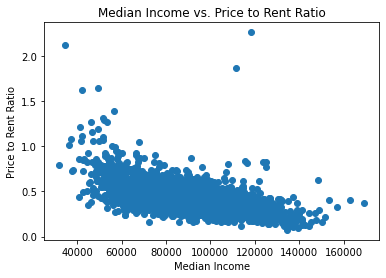

In [21]:
# Scatter plot
plt.scatter(price_rent_income_data['Median_Income'], price_rent_income_data['Price_to_Rent_Ratio'])
plt.xlabel('Median Income')
plt.ylabel('Price to Rent Ratio')
plt.title('Median Income vs. Price to Rent Ratio')
plt.show()

Educational attainment's influence on housing affordability is explored. Higher education levels often correlate with economic stability and housing demand.

In [22]:
query = """
SELECT 
    property.ZipCode,
    property."2024-10-31" AS Property_Oct_2024,
    rent."2024-10-31" AS Rent_Oct_2024,
    educational_attainment.Percent_Bachelors_Or_Higher,
    (rent."2024-10-31" / property."2024-10-31") * 100 AS Price_to_Rent_Ratio
FROM property
JOIN rent ON property.ZipCode = rent.ZipCode
JOIN educational_attainment ON property.ZipCode = educational_attainment.ZipCode;
"""

price_rent_education_data = pd.read_sql_query(query, conn)
price_rent_education_data['Percent_Bachelors_Or_Higher'] = pd.to_numeric(
    price_rent_education_data['Percent_Bachelors_Or_Higher'], errors='coerce'
)
print(price_rent_education_data['Percent_Bachelors_Or_Higher'].head())
print(price_rent_education_data['Percent_Bachelors_Or_Higher'].dtype)
print(price_rent_education_data['Percent_Bachelors_Or_Higher'].isnull().sum())

# Calculate correlation
correlation = price_rent_education_data[['Price_to_Rent_Ratio', 'Percent_Bachelors_Or_Higher']].corr()

# Display the result
print(correlation)

0    66.3
1    28.4
2    29.7
3    34.1
4    41.8
Name: Percent_Bachelors_Or_Higher, dtype: float64
float64
0
                             Price_to_Rent_Ratio  Percent_Bachelors_Or_Higher
Price_to_Rent_Ratio                     1.000000                    -0.488134
Percent_Bachelors_Or_Higher            -0.488134                     1.000000


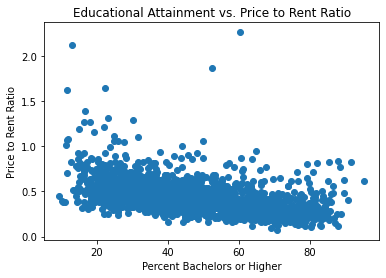

In [23]:
plt.scatter(price_rent_education_data['Percent_Bachelors_Or_Higher'], price_rent_education_data['Price_to_Rent_Ratio'])
plt.xlabel('Percent Bachelors or Higher')
plt.ylabel('Price to Rent Ratio')
plt.title('Educational Attainment vs. Price to Rent Ratio')
plt.show()

The relationship between employment metrics (employment and unemployment rates) and the price-to-rent ratio is analyzed. This shows how labor market conditions impact housing affordability and demand.

In [24]:
query = """
SELECT 
    property.ZipCode,
    (rent."2024-10-31" / property."2024-10-31") * 100 AS Price_to_Rent_Ratio,
    employment_rate.Employment_Rate,
    employment_rate.Unemployment_Rate
FROM property
JOIN rent ON property.ZipCode = rent.ZipCode
JOIN employment_rate ON property.ZipCode = employment_rate.ZipCode;
"""

price_rent_employment_data = pd.read_sql_query(query, conn)

# Calculate correlation
correlation = price_rent_employment_data[['Price_to_Rent_Ratio', 'Employment_Rate', 'Unemployment_Rate']].corr()

# Display the result
print(correlation)

                     Price_to_Rent_Ratio  Employment_Rate  Unemployment_Rate
Price_to_Rent_Ratio             1.000000        -0.249318           0.232198
Employment_Rate                -0.249318         1.000000          -0.477555
Unemployment_Rate               0.232198        -0.477555           1.000000


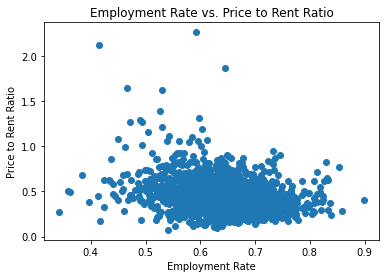

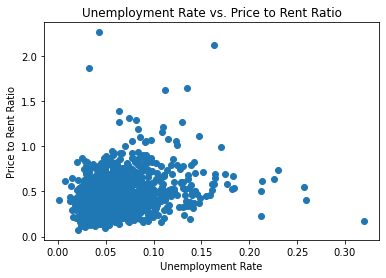

In [25]:
# Scatter plot for Price-to-Rent Ratio vs. Employment Rate
plt.scatter(price_rent_employment_data['Employment_Rate'], price_rent_employment_data['Price_to_Rent_Ratio'])
plt.xlabel('Employment Rate')
plt.ylabel('Price to Rent Ratio')
plt.title('Employment Rate vs. Price to Rent Ratio')
plt.show()

# Scatter plot for Price-to-Rent Ratio vs. Unemployment Rate
plt.scatter(price_rent_employment_data['Unemployment_Rate'], price_rent_employment_data['Price_to_Rent_Ratio'])
plt.xlabel('Unemployment Rate')
plt.ylabel('Price to Rent Ratio')
plt.title('Unemployment Rate vs. Price to Rent Ratio')
plt.show()

The correlation between median age and the price-to-rent ratio is calculated. This helps assess whether age demographics influence housing market trends.

In [26]:
query = """
SELECT 
    property.ZipCode,
    (rent."2024-10-31" / property."2024-10-31") * 100 AS Price_to_Rent_Ratio,
    median_age.Median_Age_Approx
FROM property
JOIN rent ON property.ZipCode = rent.ZipCode
JOIN median_age ON property.ZipCode = median_age.ZipCode;
"""

price_rent_median_age_data = pd.read_sql_query(query, conn)

# Calculate correlation
correlation = price_rent_median_age_data[['Price_to_Rent_Ratio', 'Median_Age_Approx']].corr()

# Display the result
print(correlation)

                     Price_to_Rent_Ratio  Median_Age_Approx
Price_to_Rent_Ratio             1.000000          -0.153717
Median_Age_Approx              -0.153717           1.000000


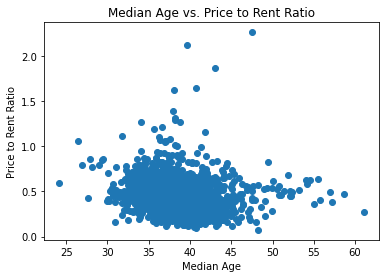

In [27]:
plt.scatter(price_rent_median_age_data['Median_Age_Approx'], price_rent_median_age_data['Price_to_Rent_Ratio'])
plt.xlabel('Median Age')
plt.ylabel('Price to Rent Ratio')
plt.title('Median Age vs. Price to Rent Ratio')
plt.show()

Homeownership and rental vacancy rates are analyzed in relation to the price-to-rent ratio. This provides insights into supply-side housing market dynamics.

In [28]:
query = """
SELECT 
    property.ZipCode,
    (rent."2024-10-31" / property."2024-10-31") * 100 AS Price_to_Rent_Ratio,
    homeownership_rate.Homeowner_Vacancy_Rate,
    homeownership_rate.Rental_Vacancy_Rate,
    homeownership_rate.GRAPI_20_24_Percent,
    homeownership_rate.GRAPI_25_29_Percent,
    homeownership_rate.GRAPI_30_34_Percent,
    homeownership_rate.GRAPI_35_Plus_Percent
FROM property
JOIN rent ON property.ZipCode = rent.ZipCode
JOIN homeownership_rate ON property.ZipCode = homeownership_rate.ZipCode;
"""

price_rent_vacancy_data = pd.read_sql_query(query, conn)


# Convert specified columns to numeric
price_rent_vacancy_data[['Homeowner_Vacancy_Rate', 'Rental_Vacancy_Rate', 
                         'GRAPI_20_24_Percent', 'GRAPI_25_29_Percent', 
                         'GRAPI_30_34_Percent', 'GRAPI_35_Plus_Percent']] = price_rent_vacancy_data[
    ['Homeowner_Vacancy_Rate', 'Rental_Vacancy_Rate', 
     'GRAPI_20_24_Percent', 'GRAPI_25_29_Percent', 
     'GRAPI_30_34_Percent', 'GRAPI_35_Plus_Percent']
].apply(pd.to_numeric, errors='coerce')

# Calculate correlation
correlation = price_rent_vacancy_data[['Price_to_Rent_Ratio', 'Homeowner_Vacancy_Rate', 'Rental_Vacancy_Rate', 
                                       'GRAPI_20_24_Percent', 'GRAPI_25_29_Percent', 'GRAPI_30_34_Percent', 'GRAPI_35_Plus_Percent' ]].corr()

# Display the result
print(correlation)

                        Price_to_Rent_Ratio  Homeowner_Vacancy_Rate  \
Price_to_Rent_Ratio                1.000000                0.129016   
Homeowner_Vacancy_Rate             0.129016                1.000000   
Rental_Vacancy_Rate                0.071999                0.243168   
GRAPI_20_24_Percent               -0.118016               -0.094174   
GRAPI_25_29_Percent               -0.051608               -0.063714   
GRAPI_30_34_Percent               -0.020966               -0.009159   
GRAPI_35_Plus_Percent              0.234337                0.065557   

                        Rental_Vacancy_Rate  GRAPI_20_24_Percent  \
Price_to_Rent_Ratio                0.071999            -0.118016   
Homeowner_Vacancy_Rate             0.243168            -0.094174   
Rental_Vacancy_Rate                1.000000            -0.045690   
GRAPI_20_24_Percent               -0.045690             1.000000   
GRAPI_25_29_Percent               -0.045218             0.040964   
GRAPI_30_34_Percent    

Population growth rates are evaluated alongside housing affordability metrics to identify areas with both demographic growth and favorable housing conditions.

In [29]:
query = """
SELECT 
    property.ZipCode,
    (rent."2024-10-31" / property."2024-10-31") * 100 AS Price_to_Rent_Ratio,
    population.Total_Population_2020,
    population.Growth_Percentage
FROM property
JOIN rent ON property.ZipCode = rent.ZipCode
JOIN population ON property.ZipCode = population.ZipCode;
"""

price_rent_population_data = pd.read_sql_query(query, conn)

# Calculate correlation
correlation = price_rent_population_data[['Price_to_Rent_Ratio', 'Total_Population_2020', 'Growth_Percentage']].corr()

# Display the result
print(correlation)

                       Price_to_Rent_Ratio  Total_Population_2020  \
Price_to_Rent_Ratio               1.000000              -0.013713   
Total_Population_2020            -0.013713               1.000000   
Growth_Percentage                -0.043727               0.042300   

                       Growth_Percentage  
Price_to_Rent_Ratio            -0.043727  
Total_Population_2020           0.042300  
Growth_Percentage               1.000000  


In [30]:
filtered_data = population_data[
    (population_data['Growth_Percentage'] > 0) &
    (price_rent_population_data['Price_to_Rent_Ratio'] >= 1.9)
]

# Display filtered results
print(filtered_data)

     ZipCode  Total_Population_2010  Total_Population_2020  Growth_Percentage
1778   06353                    162                    175           8.024691


## Composite Index Creation
### Data Normalization
Key metrics (e.g., price-to-rent ratio, income, education, employment, population growth, and vacancy rates) are normalized to create a standardized comparison. Metrics like median income and median home price are inverted to align with the composite scoring logic.

In [31]:
# Load data from SQL into a DataFrame
query = """
SELECT 
    property.ZipCode,
    property.City,
    property.State,
    property."2024-10-31" AS Median_Home_Price,
    (rent."2024-10-31" / property."2024-10-31") * 100 AS Price_to_Rent_Ratio,
    income.Median_Income,
    educational_attainment.Percent_Bachelors_Or_Higher,
    employment_rate.Employment_Rate,
    population.Growth_Percentage,
    homeownership_rate.Rental_Vacancy_Rate
FROM property
JOIN rent ON property.ZipCode = rent.ZipCode
JOIN income ON property.ZipCode = income.ZipCode
JOIN educational_attainment ON property.ZipCode = educational_attainment.ZipCode
JOIN employment_rate ON property.ZipCode = employment_rate.ZipCode
JOIN population ON property.ZipCode = population.ZipCode
JOIN homeownership_rate ON property.ZipCode = homeownership_rate.ZipCode;
"""


data = pd.read_sql_query(query, conn)

columns_to_convert = ['Price_to_Rent_Ratio', 'Median_Income', 'Percent_Bachelors_Or_Higher',
                      'Employment_Rate', 'Growth_Percentage', 'Rental_Vacancy_Rate', 'Median_Home_Price']

for col in columns_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce')
    
correlation_matrix = data[['Price_to_Rent_Ratio', 'Median_Income', 
                           'Percent_Bachelors_Or_Higher', 'Employment_Rate', 
                           'Growth_Percentage', 'Rental_Vacancy_Rate', 'Median_Home_Price']].corr()

print(correlation_matrix['Price_to_Rent_Ratio'])

# Normalize metrics
for col in ['Price_to_Rent_Ratio', 'Percent_Bachelors_Or_Higher', 'Employment_Rate', 
            'Growth_Percentage', 'Rental_Vacancy_Rate']:
    data[f'Normalized_{col}'] = (data[col] - data[col].min()) / (data[col].max() - data[col].min())

# Add inverted metrics
data['Normalized_Median_Income'] = 1 - ((data['Median_Income'] - data['Median_Income'].min()) / 
                                        (data['Median_Income'].max() - data['Median_Income'].min()))
data['Normalized_Median_Home_Price'] = 1 - ((data['Median_Home_Price'] - data['Median_Home_Price'].min()) / 
                                            (data['Median_Home_Price'].max() - data['Median_Home_Price'].min()))

Price_to_Rent_Ratio            1.000000
Median_Income                 -0.565711
Percent_Bachelors_Or_Higher   -0.487783
Employment_Rate               -0.248864
Growth_Percentage             -0.043727
Rental_Vacancy_Rate            0.071830
Median_Home_Price             -0.596728
Name: Price_to_Rent_Ratio, dtype: float64


### Weighting and Scoring
Normalized metrics are assigned weights based on their importance in determining housing market attractiveness. A composite score is calculated for each zip code to rank them.

In [32]:
# Weights for the composite score
weights = {
    'Normalized_Price_to_Rent_Ratio': 0.1,
    'Normalized_Median_Home_Price': 0.3,
    'Normalized_Median_Income': 0.2,
    'Normalized_Percent_Bachelors_Or_Higher': 0.15,
    'Normalized_Employment_Rate': 0.1,
    'Normalized_Growth_Percentage': 0.1,
    'Normalized_Rental_Vacancy_Rate': 0.05
}

# Calculate the composite score
data['Composite_Score'] = sum(data[col] * weight for col, weight in weights.items())

### Sorting and Analysis

Zip codes are sorted by composite score to identify the most and least attractive housing markets. This final step synthesizes the analysis into actionable insights for decision-making.

In [40]:
# Sort by composite score
data = data.sort_values(by='Composite_Score', ascending=False)

In [41]:
# Display highest ranking zip codes
print(data[['ZipCode', 'City', 'State','Composite_Score', 'Price_to_Rent_Ratio', 'Median_Home_Price', 'Growth_Percentage', 'Percent_Bachelors_Or_Higher']].head(20))

     ZipCode             City State  Composite_Score  Price_to_Rent_Ratio  \
1657   90210    Beverly Hills    CA         0.212749             0.183758   
1771   90402     Santa Monica    CA         0.311195             0.219654   
1588   90272      Los Angeles    CA         0.327651             0.255104   
1655   90265           Malibu    CA         0.337310             0.393960   
1694   85253  Paradise Valley    AZ         0.339620             0.073589   
753    94010     Hillsborough    CA         0.340612             0.098097   
1530   92651     Laguna Beach    CA         0.353903             0.165167   
1363   10013         New York    NY         0.354843             0.181220   
1384   94306        Palo Alto    CA         0.358953             0.103921   
239    95014        Cupertino    CA         0.362342             0.128065   
1725   92118         Coronado    CA         0.362631             0.173414   
1107   92660    Newport Beach    CA         0.364745             0.143238   

In [42]:
# Sort by composite score
data = data.sort_values(by='Composite_Score', ascending=True)

# Display lowest ranking zip codes
print(data[['ZipCode', 'City', 'State','Composite_Score', 'Price_to_Rent_Ratio', 'Median_Home_Price', 'Growth_Percentage', 'Percent_Bachelors_Or_Higher']].head(20))

     ZipCode             City State  Composite_Score  Price_to_Rent_Ratio  \
1657   90210    Beverly Hills    CA         0.212749             0.183758   
1771   90402     Santa Monica    CA         0.311195             0.219654   
1588   90272      Los Angeles    CA         0.327651             0.255104   
1655   90265           Malibu    CA         0.337310             0.393960   
1694   85253  Paradise Valley    AZ         0.339620             0.073589   
753    94010     Hillsborough    CA         0.340612             0.098097   
1530   92651     Laguna Beach    CA         0.353903             0.165167   
1363   10013         New York    NY         0.354843             0.181220   
1384   94306        Palo Alto    CA         0.358953             0.103921   
239    95014        Cupertino    CA         0.362342             0.128065   
1725   92118         Coronado    CA         0.362631             0.173414   
1107   92660    Newport Beach    CA         0.364745             0.143238   

## Conclusion & Findings
The analysis reveals several key insights about the U.S. real estate market, focusing on areas of high rental investment potential and the factors influencing price-to-rent ratios. The count of zip codes meeting the "1% rule" indicates that Pennsylvania emerges as a strong contender with the highest number of qualifying zip codes (7), followed by Maryland and New York (3 each), and Florida and Ohio (2 each). These findings highlight Pennsylvania's prominence as a favorable state for rental investment opportunities.

The correlation analysis provides deeper insights into the factors affecting price-to-rent ratios. A moderately negative correlation between price-to-rent ratios and median income (-0.57) suggests that areas with lower incomes often have relatively higher rent compared to property prices, making them attractive for rental investments. Similarly, a weaker negative correlation with educational attainment (-0.49) implies that areas with higher educational levels tend to have lower price-to-rent ratios, potentially reflecting more stable and affluent housing markets.

Employment metrics show weaker correlations, with the employment rate negatively correlated (-0.25) and the unemployment rate slightly positively correlated (0.23) with price-to-rent ratios. These suggest that areas with stronger job markets may have less favorable rent-to-property-price ratios for investors, possibly due to higher property values.

Demographic factors such as median age (-0.15) and population growth (-0.04) show minimal impact on price-to-rent ratios, indicating that other variables may play more critical roles in determining rental investment attractiveness. Vacancy rates show weak correlations, with homeowner vacancy rates (0.13) and rental vacancy rates (0.07) having limited influence on price-to-rent ratios.

The composite scoring approach further refines the analysis by integrating multiple metrics such as price-to-rent ratios, median income, employment rate, educational attainment, and population growth. High-ranking zip codes, such as those in Houston, Minneapolis, and Washington, D.C., demonstrate strong rental investment potential with balanced scores across these factors. On the other hand, lower-ranking zip codes, including Beverly Hills and Santa Monica, exhibit low price-to-rent ratios, high property prices, and limited growth potential, making them less attractive for rental investments despite their affluent profiles.

In conclusion, the analysis identifies Pennsylvania as a leading state for rental investment opportunities based on the "1% rule," while demographic, economic, and market factors provide additional context for assessing market attractiveness. The composite scoring system provides a comprehensive framework for evaluating zip codes, empowering investors to make informed decisions about where to allocate their resources.